In [15]:
#used tensorflow 2.1.0
pip install tensorflow==2.1.0


In [16]:
#moving dataset from drive to collab env
!mv /content/drive/'My Drive'/Dataset.zip /content/Dataset.zip
!unzip /content/Dataset.zip #unziping dataset

Archive:  /content/Dataset.zip
   creating: Dataset/
   creating: Dataset/Train/
   creating: Dataset/Train/Amy/
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_1.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_10.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_11.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_12.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_13.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_14.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_15.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_16.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_17.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_18.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_19.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_21.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_25.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_26.jpeg  
  inflating: Dataset/Train/Amy/Amy Farrah Fowler_27.jpeg  
  i

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
print(tf.__version__)

2.1.0


In [140]:
vgg = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False) #importing VGG16

In [141]:
#Dont train the layers again
for layer in vgg.layers:
  layer.trainable = False 

In [166]:
import os
classes = len(os.listdir('/content/Dataset/Train/')) # getting no of classes 

In [167]:
print("No of classes are: {}".format(classes))


No of classes are: 7


In [175]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg.output)
#hidden layer with 1024 hidden units and relu activation
#x =  layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (classes, activation='softmax')(x)         


In [176]:
model = Model(inputs=vgg.input, outputs=x) # defining model object

In [177]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [178]:
# compiling model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [179]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#image augmentaton
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   )

In [180]:
training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 161 images belonging to 7 classes.


In [182]:
# fitting  the model
history = model.fit_generator(
  training_set,
  epochs=50,
  steps_per_epoch=len(training_set),
 )

  ...
    to  
  ['...']
Train for 6 steps
Epoch 1/50
6/6 [==============================] - 2s 365ms/step - loss: 3.3033 - accuracy: 0.1801
Epoch 2/50
6/6 [==============================] - 2s 358ms/step - loss: 2.2109 - accuracy: 0.3106
Epoch 3/50
6/6 [==============================] - 2s 358ms/step - loss: 1.6506 - accuracy: 0.4410
Epoch 4/50
6/6 [==============================] - 2s 362ms/step - loss: 1.2408 - accuracy: 0.4783
Epoch 5/50
6/6 [==============================] - 2s 367ms/step - loss: 1.5891 - accuracy: 0.5404
Epoch 6/50
6/6 [==============================] - 2s 363ms/step - loss: 1.0642 - accuracy: 0.5652
Epoch 7/50
6/6 [==============================] - 2s 358ms/step - loss: 1.0413 - accuracy: 0.6087
Epoch 8/50
6/6 [==============================] - 2s 359ms/step - loss: 0.8408 - accuracy: 0.6708
Epoch 9/50
6/6 [==============================] - 2s 361ms/step - loss: 0.6837 - accuracy: 0.7205
Epoch 10/50
6/6 [==============================] - 2s 356ms/step - loss: 0.

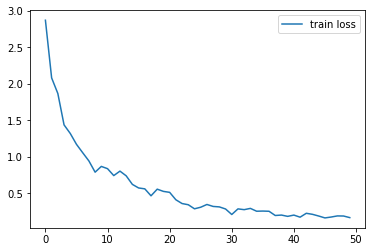

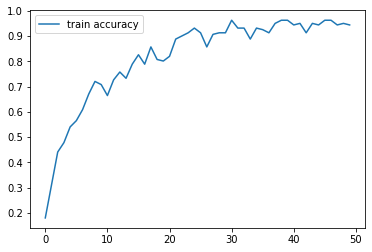

In [183]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.show()


# accuracies
plt.plot(history.history['accuracy'], label='train accuracy')
plt.legend()
plt.show()

In [199]:
model.save('model.h5') #saving model

In [29]:
from google.colab import files
files.download('/content/model.h5')  #downloading model 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>